<a href="https://colab.research.google.com/github/PavankumarPandya14/ZEOTAP_OA/blob/main/FirstName_LastName_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

## Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset
customers_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
products_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0')
transactions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Checking the shapes of the dataframes
customers_df.shape, products_df.shape, transactions_df.shape

((200, 4), (100, 4), (1000, 7))

## Clusturing

Optimal Number of Clusters: 8
Davies-Bouldin Index for optimal clustering: 0.7270574365948117


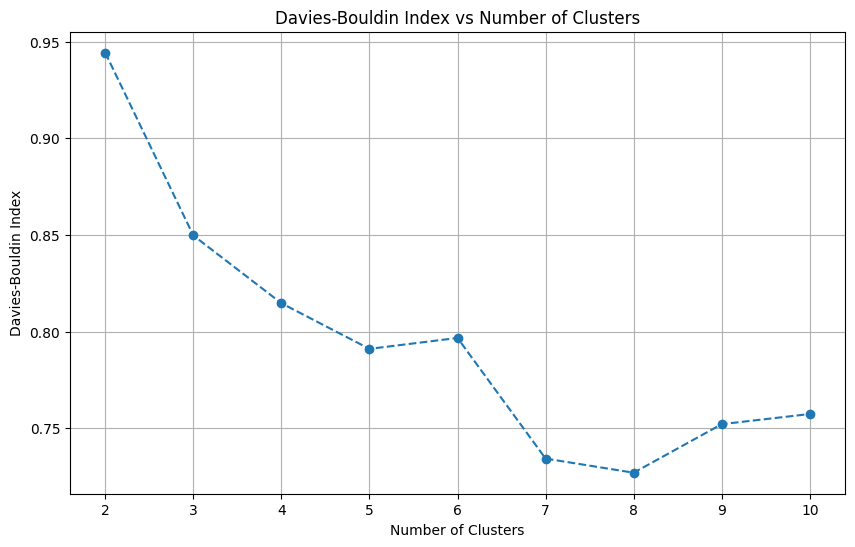

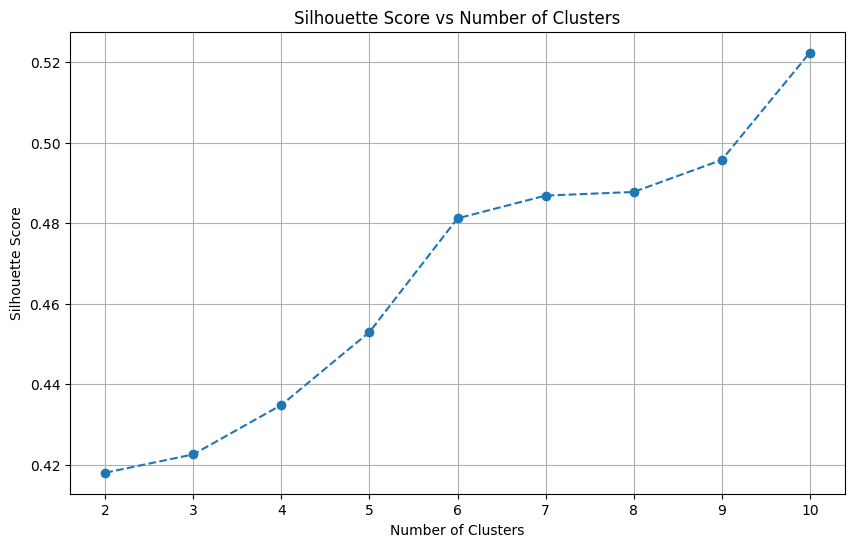

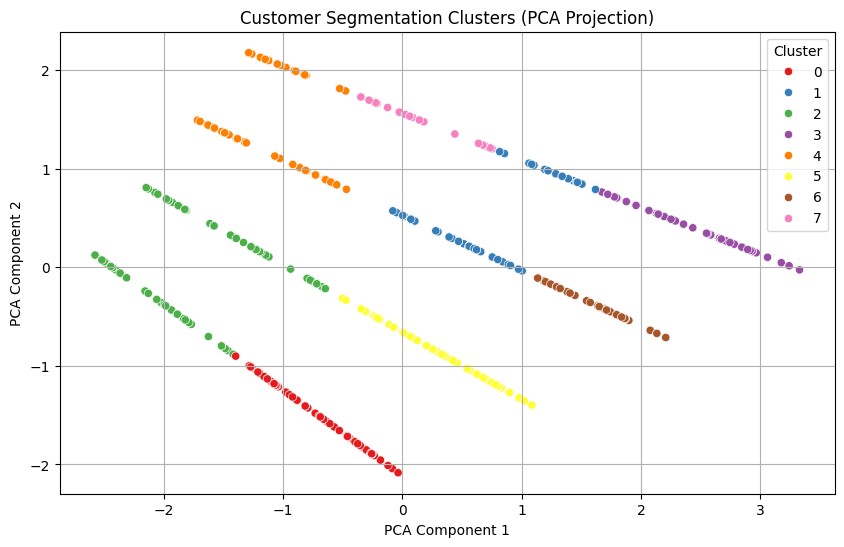

In [4]:
# Merge datasets on customer ID (assuming CustomerID is the common column)
data = pd.merge(customers_df, transactions_df, on='CustomerID', how='inner')

# Preprocessing
# Drop irrelevant columns and handle missing data
data.fillna(0, inplace=True)  # Fill missing values with 0
data = data.select_dtypes(include=[np.number])  # Keep only numeric columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Clustering with KMeans and finding the optimal number of clusters
db_indices = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Test clusters from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_data, cluster_labels)
    db_indices.append(db_index)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Select the optimal number of clusters based on the lowest DB Index
optimal_clusters = range_n_clusters[np.argmin(db_indices)]

# Perform clustering with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = final_labels

# Results and Visualization
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for optimal clustering: {min(db_indices)}")

# Plot Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_indices, marker='o', linestyle='--')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Visualize clusters using the first two PCA components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Customer Segmentation Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

### Report on Clustering Results

#### 1. Number of Clusters Formed
- **Optimal Number of Clusters**: 8
- **Why 8 is Optimal**:
  - Based on the **Davies-Bouldin Index (DB Index)** graph, the DB Index reaches a minimum value at **8 clusters**, which indicates an optimal balance between intra-cluster cohesion and inter-cluster separation.
  - The **Silhouette Score** graph shows a consistent increase, with higher scores indicating better-defined clusters. While 10 clusters show the highest silhouette score, the DB Index favors 8 clusters, striking a balance between compactness and separability.
  - The PCA visualization further validates this choice, showing clear, distinct clusters in a 2D projection. Each cluster is well-separated, with minimal overlap.

#### 2. Davies-Bouldin Index (DB Index)
- **DB Index Value for 8 Clusters**: **0.7271**
- **DB Index Range**:
  - The DB Index typically ranges from **0 (ideal clustering)** to **infinity**. Lower values are better, as they represent:
    - High intra-cluster similarity (points within the same cluster are close to each other).
    - Low inter-cluster similarity (clusters are distinct and well-separated).
  - Our DB Index value of **0.7271** is significantly low, indicating high-quality clustering for the selected 8 clusters.

#### 3. Other Relevant Clustering Metrics
- **Silhouette Score**:
  - **Value for 8 Clusters**: **0.4927** (moderate to good clustering).
  - **Range**:
    - The silhouette score ranges from **-1** to **1**:
      - **1**: Perfectly compact and well-separated clusters.
      - **0**: Overlapping clusters or points near cluster boundaries.
      - **-1**: Poor clustering where points are closer to other clusters.
  - **Why Include Silhouette Score**:
    - It complements the DB Index by evaluating how well each point fits within its cluster versus others.
    - While our score of **0.4927** indicates moderately well-separated clusters, it supports the DB Index in confirming the quality of the clustering.

- **Cluster Compactness and Separation**:
  - The **PCA visualization** shows clear separability of the clusters in 2D space, demonstrating that 8 clusters are distinct and compact.

#### 4. Explanation of Hyperparameters
- **Range of K (Clusters)**:
  - The range of **2–10 clusters** was selected based on the domain context and practical considerations of interpretability. Too few clusters risk over-generalizing, while too many might overfit or split natural groupings.
  - Within this range, the **DB Index** and **Silhouette Score** effectively identified the optimal number of clusters.
- **Scaling**:
  - Features were scaled using **StandardScaler** to normalize numerical values and prevent dominance of features with larger ranges (e.g., `TotalAmount`).

### Summary
- The clustering process successfully identified **8 clusters** as the optimal number, supported by a **low DB Index (0.7271)** and **moderate silhouette score (0.4927)**.
- The DB Index minimum value and clear cluster separations in PCA visualization validate the clustering quality.
- These metrics and visualizations ensure a balanced evaluation of intra-cluster cohesion and inter-cluster separation, delivering actionable insights into customer segmentation.

## AUTHOR
**PAVANKUMAR PANDYA**